In [10]:
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [11]:
df_votants = pd.read_csv('database_deputes.csv', index_col=0)
df_votes = pd.read_csv('database_votes2.csv', index_col=0)

## Construction d'autres indices 

#### Proportion vote

In [12]:
proportion_vote = pd.read_csv('proportion_vote.csv', index_col=0)
proportion_vote

,idVotant,Contre,Pour
0,PA1008,31.162791,68.837209
1,PA1012,34.131737,65.868263
2,PA1029,51.818182,48.181818
3,PA1198,33.234421,66.765579
4,PA1206,45.454545,54.545455
...,...,...,...
570,PA774962,80.000000,20.000000
571,PA856,42.780749,57.219251
572,PA923,41.991342,58.008658
573,PA942,49.778761,50.221239


#### Indice d'accord

In [13]:
indice_accord = pd.read_csv('indice_accord.csv', index_col=0)
indice_accord = indice_accord[['idVotant', 'IndiceAccord']]
indice_accord = indice_accord.rename(columns={'IndiceAccord' : 'indice_accord'})
indice_accord

,idVotant,indice_accord
0,PA719952,74.000000
1,PA607395,71.171171
2,PA718710,76.120959
3,PA718802,74.705882
4,PA719032,74.860957
...,...,...
570,PA720802,36.000000
571,PA643004,27.272727
572,PA719002,14.285714
573,PA774958,14.583333


#### Taux de participation

In [14]:
participation = df_votes.groupby('idVotant').count()
participation['taux_participation'] = participation['idScrutin']/3117*100
participation = participation[['taux_participation']]
participation

,taux_participation
idVotant,
PA1008,20.692974
PA1012,10.715432
PA1029,3.529034
PA1198,10.811678
PA1206,5.646455
...,...
PA774962,0.160411
PA856,11.998717
PA923,7.410972


On crée un dataframe contenant uniquement les indices :

In [17]:
df_indices = proportion_vote.merge(indice_accord, on='idVotant', how='left')
df_indices = df_indices.merge(participation, on='idVotant', how='left')
df_indices = df_indices.set_index('idVotant')

df_indices

,Contre,Pour,indice_accord,taux_participation
idVotant,,,,
PA1008,31.162791,68.837209,31.937984,20.692974
PA1012,34.131737,65.868263,37.425150,10.715432
PA1029,51.818182,48.181818,43.636364,3.529034
PA1198,33.234421,66.765579,32.047478,10.811678
PA1206,45.454545,54.545455,28.409091,5.646455
...,...,...,...,...
PA774962,80.000000,20.000000,40.000000,0.160411
PA856,42.780749,57.219251,38.770053,11.998717
PA923,41.991342,58.008658,40.259740,7.410972


### Historique de votes

On crée un dataframe contenant l'historique de vote, puis on en créera un contenant les indices et l'historique de vote

In [46]:
historique_vote = df_votes.copy()
historique_vote = historique_vote.pivot(index = 'idVotant', columns = 'idScrutin', values = 'vote')
historique_vote

idScrutin,0,1,2,3,4,5,6,7,8,9,...,3107,3108,3109,3110,3111,3112,3113,3114,3115,3116
idVotant,,,,,,,,,,,,,,,,,,,,,
PA1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Pour,NaN,NaN,NaN,Pour
PA1012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pour,NaN,NaN
PA1029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PA1198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pour,NaN,...,NaN,NaN,NaN,NaN,NaN,Pour,NaN,NaN,NaN,NaN
PA1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA774962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PA856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PA923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pour,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
#on remplace les NaN par de l'abstention (en confondant abstention et non-votant)
historique_vote = historique_vote.fillna('Non-votant')
historique_vote = pd.get_dummies(historique_vote, drop_first=True)
historique_vote

,0_Pour,1_Non-votant,1_Pour,2_Non-votant,2_Pour,3_Non-votant,3_Pour,4_Non-votant,4_Pour,5_Non-votant,...,3112_Non-votant,3112_Pour,3113_Non-votant,3113_Pour,3114_Non-votant,3114_Pour,3115_Non-votant,3115_Pour,3116_Non-votant,3116_Pour
idVotant,,,,,,,,,,,,,,,,,,,,,
PA1008,0,1,0,1,0,1,0,1,0,1,...,0,1,1,0,1,0,1,0,0,1
PA1012,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,0,1,1,0,1,0
PA1029,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
PA1198,0,1,0,1,0,1,0,1,0,1,...,0,1,1,0,1,0,1,0,1,0
PA1206,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA774962,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
PA856,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
PA923,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0


In [20]:
#ancienne option pour les nan : mettre le vote majoritaire

#copy = copy.dropna(thresh = 285) 
#un peu à l'arrache, il faudrait faire ça de manière plus jolie pcq là on sort une liste sans index 
#et on la rebalance dans le DF
#a priori pas de souci pcq le DF copy est trié mais bon c'est pas très clean
#maj = []
#for scrutin in range(3117):
 #   votemaj = pd.DataFrame(historique_vote[scrutin].value_counts())[scrutin].idxmax()
  #  maj.append(votemaj)

#historique_vote.loc['vote_majoritaire'] = maj
#historique_vote = historique_vote.fillna(historique_vote.loc['vote_majoritaire'])
#historique_vote = historique_vote.drop('vote_majoritaire', axis=0)
#historique_vote

In [22]:
#on crée le dataframe contenant l'historique de vote et les features : 
df_cluster = historique_vote.merge(df_indices, left_index=True, right_index=True)
df_cluster

,0_Pour,1_Non-votant,1_Pour,2_Non-votant,2_Pour,3_Non-votant,3_Pour,4_Non-votant,4_Pour,5_Non-votant,...,3114_Non-votant,3114_Pour,3115_Non-votant,3115_Pour,3116_Non-votant,3116_Pour,Contre,Pour,indice_accord,taux_participation
idVotant,,,,,,,,,,,,,,,,,,,,,
PA1008,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,0,1,31.162791,68.837209,31.937984,20.692974
PA1012,0,1,0,1,0,1,0,1,0,1,...,0,1,1,0,1,0,34.131737,65.868263,37.425150,10.715432
PA1029,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,51.818182,48.181818,43.636364,3.529034
PA1198,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,33.234421,66.765579,32.047478,10.811678
PA1206,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,45.454545,54.545455,28.409091,5.646455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA774962,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,80.000000,20.000000,40.000000,0.160411
PA856,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,42.780749,57.219251,38.770053,11.998717
PA923,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,41.991342,58.008658,40.259740,7.410972


#### Groupe politique pour chaque député

In [35]:
#On récupère le groupe politique pour chaque député
groupe = df_votes[['idVotant', 'Groupe politique (complet)']].drop_duplicates()
groupe = groupe.set_index('idVotant')
groupe = groupe.rename(columns={'Groupe politique (complet)' : 'Groupe'})
groupe

,Groupe
idVotant,
PA606171,La République en Marche
PA721824,La République en Marche
PA719952,La République en Marche
PA607395,La République en Marche
PA718710,La République en Marche
...,...
PA643192,Socialistes et apparentés
PA721768,La République en Marche
PA774962,Gauche démocrate et républicaine


## Clustering

In [28]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [29]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

#### Règle du coude pour l'historique de vote et les features : 

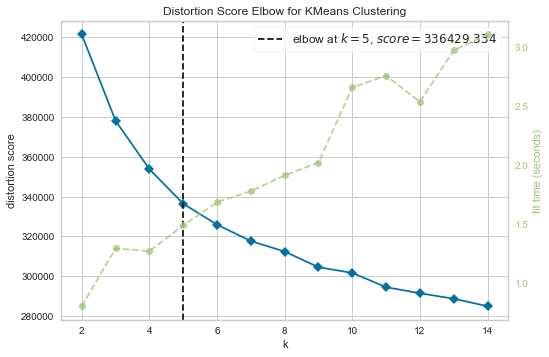

C:\Users\pmong\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\pmong\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\pmong\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


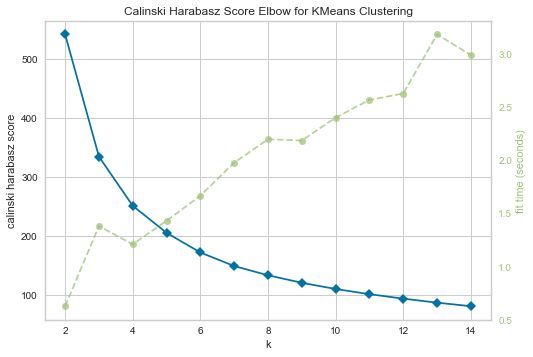

C:\Users\pmong\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\pmong\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\pmong\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


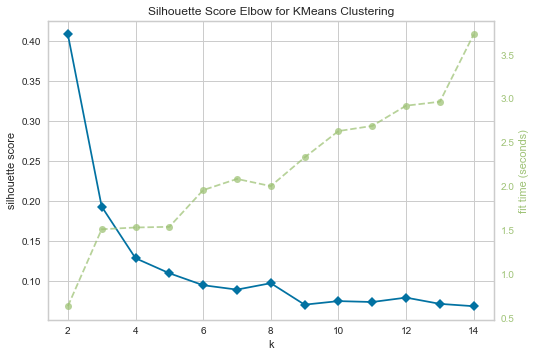

In [30]:
#on teste la règle du coude avec trois métriques différentes : 
# distorsion = somme au carré des distances de chaque point à son centroïde
# calinski_harabasz = ratio entre la dispersion entre clusters et la dispersion dans le cluster
# silhouette = moyenne du ratio entre la distance au centroïde de son cluster et la distance au centroïde le plus proche
liste_metrics = ['distortion', 'calinski_harabasz', 'silhouette']

#on fait une boucle pour visualiser la règle du coude selon la métrique utilisée
i=1
for metric in liste_metrics:
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(2,15), metric=metric) 
    visualizer.fit(df_cluster)       
    visualizer.show() 
i=+1

#### Règle du coude pour l'historique de vote uniquement : 

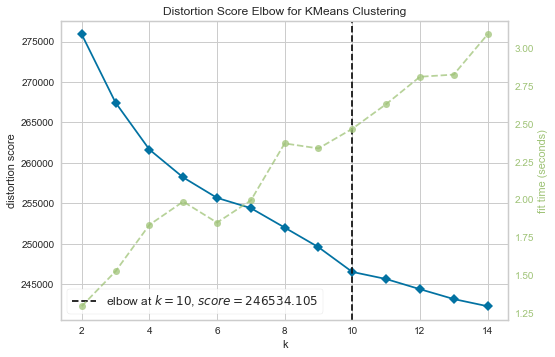

C:\Users\pmong\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\pmong\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\pmong\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


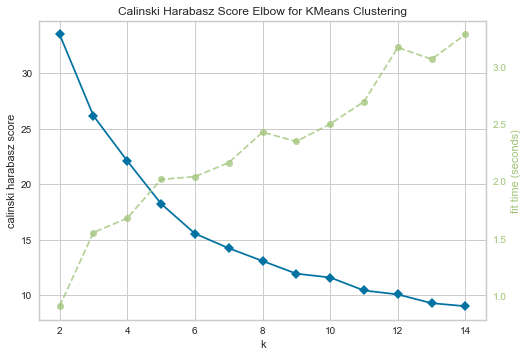

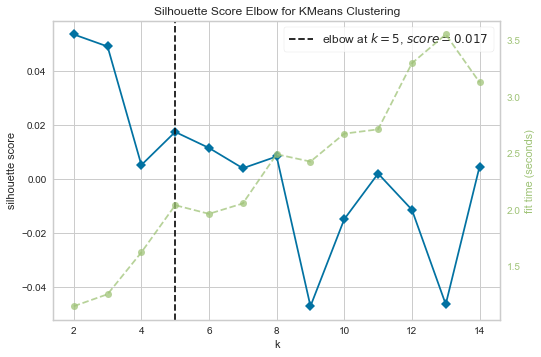

In [31]:
liste_metrics = ['distortion', 'calinski_harabasz', 'silhouette']

#on fait une boucle pour visualiser la règle du coude selon la métrique utilisée
i=1
for metric in liste_metrics:
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(2,15), metric=metric) 
    visualizer.fit(historique_vote)       
    visualizer.show() 
i=+1

#### Règle du coude pour les indices uniquement : 

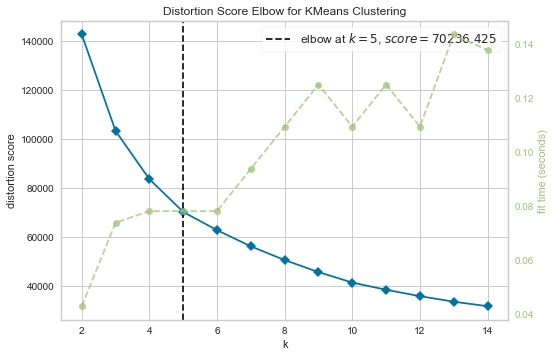

C:\Users\pmong\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\pmong\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\pmong\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


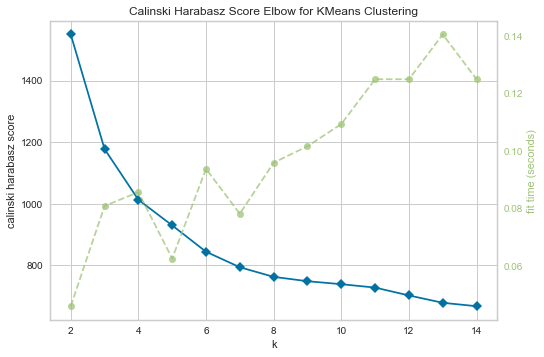

C:\Users\pmong\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\pmong\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\pmong\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


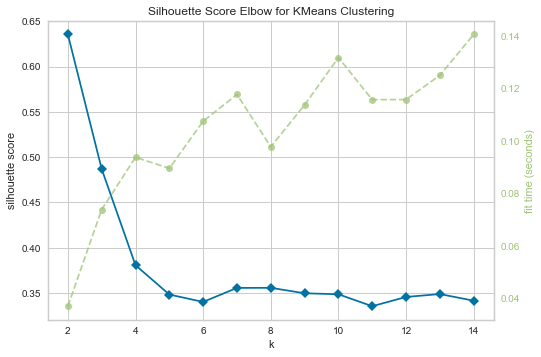

In [33]:
liste_metrics = ['distortion', 'calinski_harabasz', 'silhouette']

#on fait une boucle pour visualiser la règle du coude selon la métrique utilisée
i=1
for metric in liste_metrics:
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(2,15), metric=metric) 
    visualizer.fit(df_indices)       
    visualizer.show() 
i=+1

## Clustering sur l'historique de vote et les features

In [34]:
#La règle du coude a déterminé qu'il faut choisir 5 clusters : 
df_cluster5 = df_cluster.copy() #refaire une copie à chaque fois !!!

N_CLUSTERS = 5
clustering = KMeans(n_clusters=N_CLUSTERS)
clustering.fit(df_cluster5)

#on détermine ensuite dans quel cluster chaque individu de df_cluster sera affecté :
pred = clustering.predict(df_cluster5)

df_cluster5['cluster'] = pred #on ajoute une colonne au df, qui indique le numéro du cluster auquel appartient chaque individu

df_clusterised5 = df_cluster5
df_clusterised5

,0_Pour,1_Non-votant,1_Pour,2_Non-votant,2_Pour,3_Non-votant,3_Pour,4_Non-votant,4_Pour,5_Non-votant,...,3114_Pour,3115_Non-votant,3115_Pour,3116_Non-votant,3116_Pour,Contre,Pour,indice_accord,taux_participation,cluster
idVotant,,,,,,,,,,,,,,,,,,,,,
PA1008,0,1,0,1,0,1,0,1,0,1,...,0,1,0,0,1,31.162791,68.837209,31.937984,20.692974,0
PA1012,0,1,0,1,0,1,0,1,0,1,...,1,1,0,1,0,34.131737,65.868263,37.425150,10.715432,4
PA1029,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,51.818182,48.181818,43.636364,3.529034,4
PA1198,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,33.234421,66.765579,32.047478,10.811678,0
PA1206,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,45.454545,54.545455,28.409091,5.646455,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA774962,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,80.000000,20.000000,40.000000,0.160411,1
PA856,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,42.780749,57.219251,38.770053,11.998717,4
PA923,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,41.991342,58.008658,40.259740,7.410972,4


In [36]:
df_clusterised5 = df_clusterised5.merge(groupe, left_index=True, right_index=True)

# On crée un dataframe par cluster, afin de regarder la distribution de la variable d'intérêt dans chaque cluster
list_resultats5 = []
for i in range (N_CLUSTERS):
     list_resultats5.append(df_clusterised5[df_clusterised5['cluster'] == i])

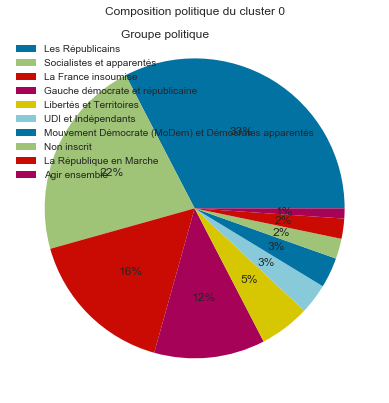

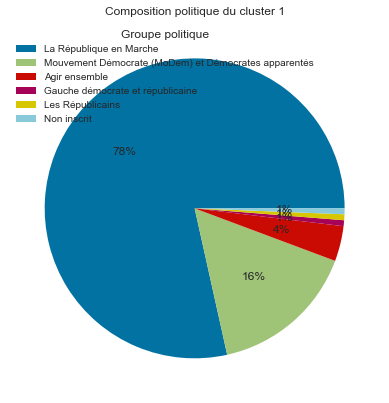

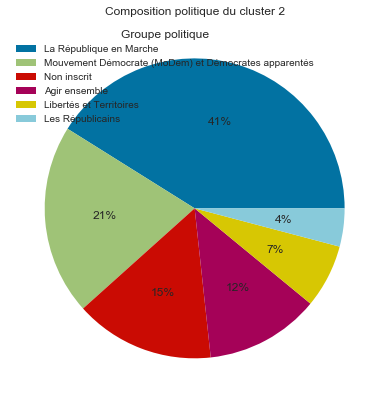

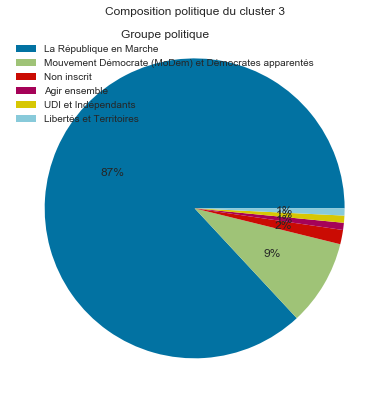

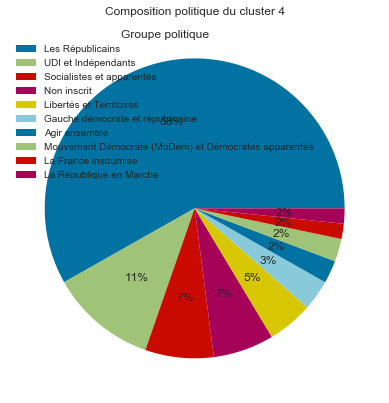

In [38]:
#On représente la composition politique de chaque cluster
i=1
for k in range(N_CLUSTERS):
    plt.figure(1, figsize=(20, 40))
    plt.subplot(N_CLUSTERS, 1, i)              
    ax = plt.pie(list_resultats5[k]["Groupe"].value_counts(normalize=True), autopct='%1.0f%%', ## modifier n° liste
            labeldistance=None)
    plt.title("Composition politique du cluster " + str(k) ) 
    labels = list_resultats5[k]['Groupe'].value_counts().index  #bien modifier le numéro de la liste selon le nb de clusters
    plt.legend(labels=labels, title='Groupe politique', loc='upper left')
    #g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')
    plt.show()
    i+=1

## Clustering sur l'historique de vote uniquement

In [39]:
#La règle du coude a déterminé qu'il faut choisir 10 clusters : 
df_cluster10 = historique_vote.copy() #refaire une copie à chaque fois !!!

N_CLUSTERS = 10
clustering = KMeans(n_clusters=N_CLUSTERS)
clustering.fit(df_cluster10)

#on détermine ensuite dans quel cluster chaque individu de df_cluster sera affecté :
pred = clustering.predict(df_cluster10)

df_cluster10['cluster'] = pred #on ajoute une colonne au df, qui indique le numéro du cluster auquel appartient chaque individu

df_clusterised10 = df_cluster10
df_clusterised10

,0_Pour,1_Non-votant,1_Pour,2_Non-votant,2_Pour,3_Non-votant,3_Pour,4_Non-votant,4_Pour,5_Non-votant,...,3112_Pour,3113_Non-votant,3113_Pour,3114_Non-votant,3114_Pour,3115_Non-votant,3115_Pour,3116_Non-votant,3116_Pour,cluster
idVotant,,,,,,,,,,,,,,,,,,,,,
PA1008,0,1,0,1,0,1,0,1,0,1,...,1,1,0,1,0,1,0,0,1,1
PA1012,0,1,0,1,0,1,0,1,0,1,...,0,1,0,0,1,1,0,1,0,3
PA1029,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,3
PA1198,0,1,0,1,0,1,0,1,0,1,...,1,1,0,1,0,1,0,1,0,1
PA1206,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA774962,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,3
PA856,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,3
PA923,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,3


In [41]:
df_clusterised10 = df_clusterised10.merge(groupe, left_index=True, right_index=True)

# On crée un dataframe par cluster, afin de regarder la distribution de la variable d'intérêt dans chaque cluster
list_resultats10 = []
for i in range (N_CLUSTERS):
     list_resultats10.append(df_clusterised10[df_clusterised10['cluster'] == i])

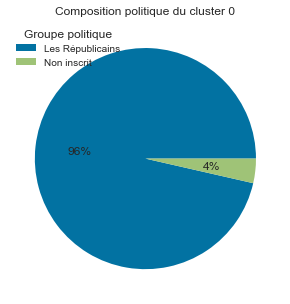

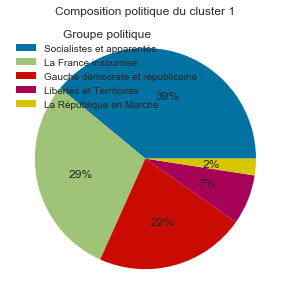

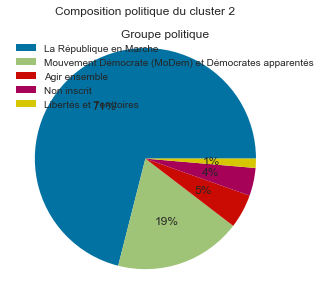

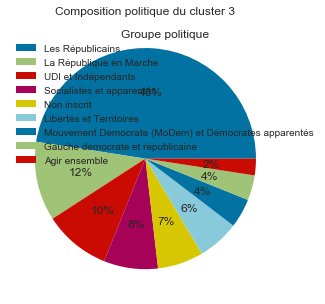

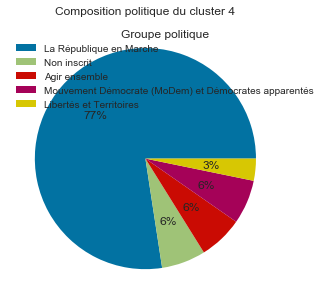

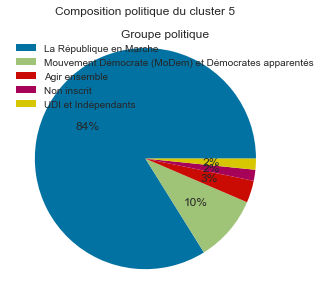

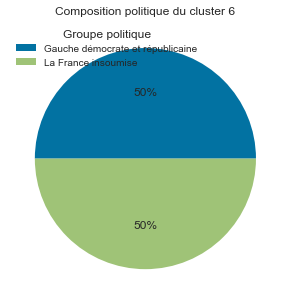

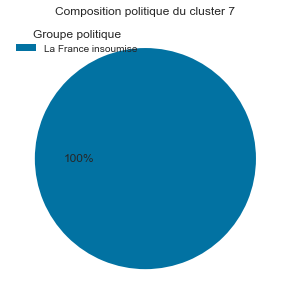

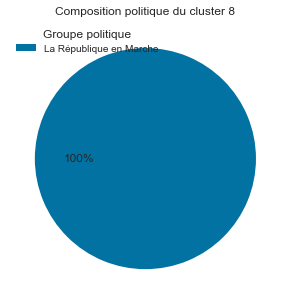

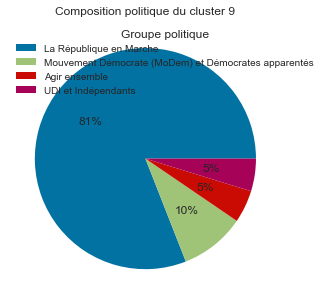

In [42]:
#On représente la composition politique de chaque cluster
i=1
for k in range(N_CLUSTERS):
    plt.figure(1, figsize=(15, 60))
    plt.subplot(N_CLUSTERS, 1, i)
    
        #mettre la liste_resultats correspondant au bon nb de clusters !!! 

    ax = plt.pie(list_resultats10[k]["Groupe"].value_counts(normalize=True), autopct='%1.0f%%', labeldistance=None)
    plt.title("Composition politique du cluster " + str(k) ) 
    
    #idem mettre le bon numéro : 
    labels = list_resultats10[k]['Groupe'].value_counts().index
    
    plt.legend(labels=labels, title='Groupe politique', loc='upper left')
    plt.show()
    i+=1

## Deux clusters

On essaye de voir si on peut retrouver une opposition gauche / droite : 

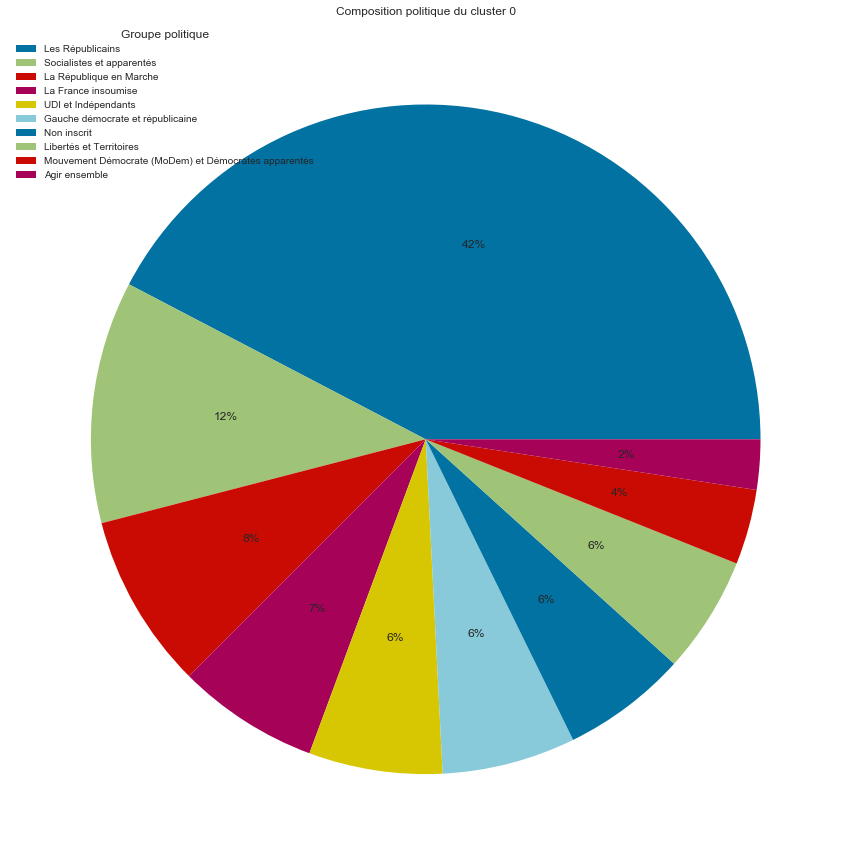

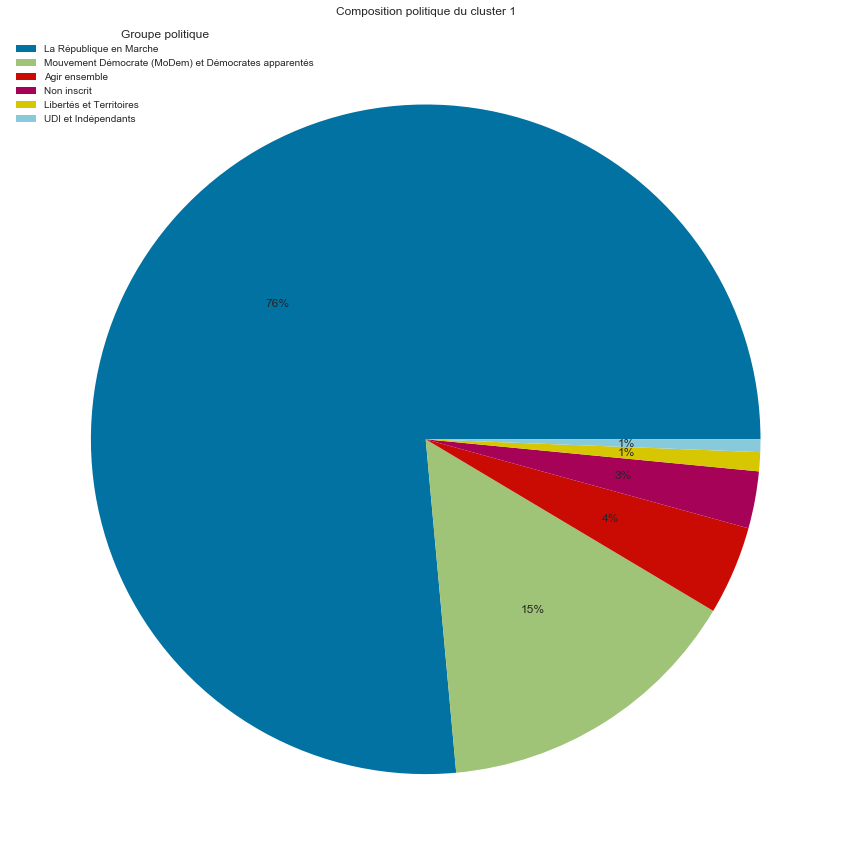

In [48]:
df_cluster2 = historique_vote.copy() #refaire une copie à chaque fois !!!

N_CLUSTERS = 2
clustering = KMeans(n_clusters=N_CLUSTERS)
clustering.fit(df_cluster2)

#on détermine ensuite dans quel cluster chaque individu de df_cluster sera affecté :
pred = clustering.predict(df_cluster2)

df_cluster2['cluster'] = pred #on ajoute une colonne au df, qui indique le numéro du cluster auquel appartient chaque individu

df_clusterised2 = df_cluster2
df_clusterised2 = df_clusterised2.merge(groupe, left_index=True, right_index=True)

# On crée un dataframe par cluster, afin de regarder la distribution de la variable d'intérêt dans chaque cluster
list_resultats2 = []
for i in range (N_CLUSTERS):
     list_resultats2.append(df_clusterised2[df_clusterised2['cluster'] == i])
        
#On représente la composition politique de chaque cluster
i=1
for k in range(N_CLUSTERS):
    plt.figure(1, figsize=(15, 60))
    plt.subplot(N_CLUSTERS, 1, i)
    
        #mettre la liste_resultats correspondant au bon nb de clusters !!! 

    ax = plt.pie(list_resultats2[k]["Groupe"].value_counts(normalize=True), autopct='%1.0f%%', labeldistance=None)
    plt.title("Composition politique du cluster " + str(k) ) 
    
    #idem mettre le bon numéro : 
    labels = list_resultats2[k]['Groupe'].value_counts().index
    
    plt.legend(labels=labels, title='Groupe politique', loc='upper left')
    plt.show()
    i+=1

# ACP

#### ACP pour le clustering sur historique de vote + features (5 clusters)

In [51]:
groupe_to_labels = {groupe : idx for idx, groupe in enumerate(df_clusterised5.Groupe.unique())}
labels_to_groupe = {label : groupe for groupe, label in groupe_to_labels.items()}

labels = [groupe_to_labels[groupe] for groupe in df_clusterised5.Groupe]

df_clusterised5['labels'] = labels

In [53]:
df_clusterised_preacp = df_clusterised5.drop(['cluster', 'labels','Groupe'], axis=1)
df_clusterised_preacp

,0_Pour,1_Non-votant,1_Pour,2_Non-votant,2_Pour,3_Non-votant,3_Pour,4_Non-votant,4_Pour,5_Non-votant,...,3114_Non-votant,3114_Pour,3115_Non-votant,3115_Pour,3116_Non-votant,3116_Pour,Contre,Pour,indice_accord,taux_participation
idVotant,,,,,,,,,,,,,,,,,,,,,
PA1008,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,0,1,31.162791,68.837209,31.937984,20.692974
PA1012,0,1,0,1,0,1,0,1,0,1,...,0,1,1,0,1,0,34.131737,65.868263,37.425150,10.715432
PA1029,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,51.818182,48.181818,43.636364,3.529034
PA1198,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,33.234421,66.765579,32.047478,10.811678
PA1206,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,45.454545,54.545455,28.409091,5.646455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA774962,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,80.000000,20.000000,40.000000,0.160411
PA856,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,42.780749,57.219251,38.770053,11.998717
PA923,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,41.991342,58.008658,40.259740,7.410972


Variance: [0.0558857  0.04739577 0.02636642 0.02003559 0.01789623 0.01573167
 0.01466486 0.01256705 0.0111164  0.01031875]
Variance totale: 0.2319784252118545


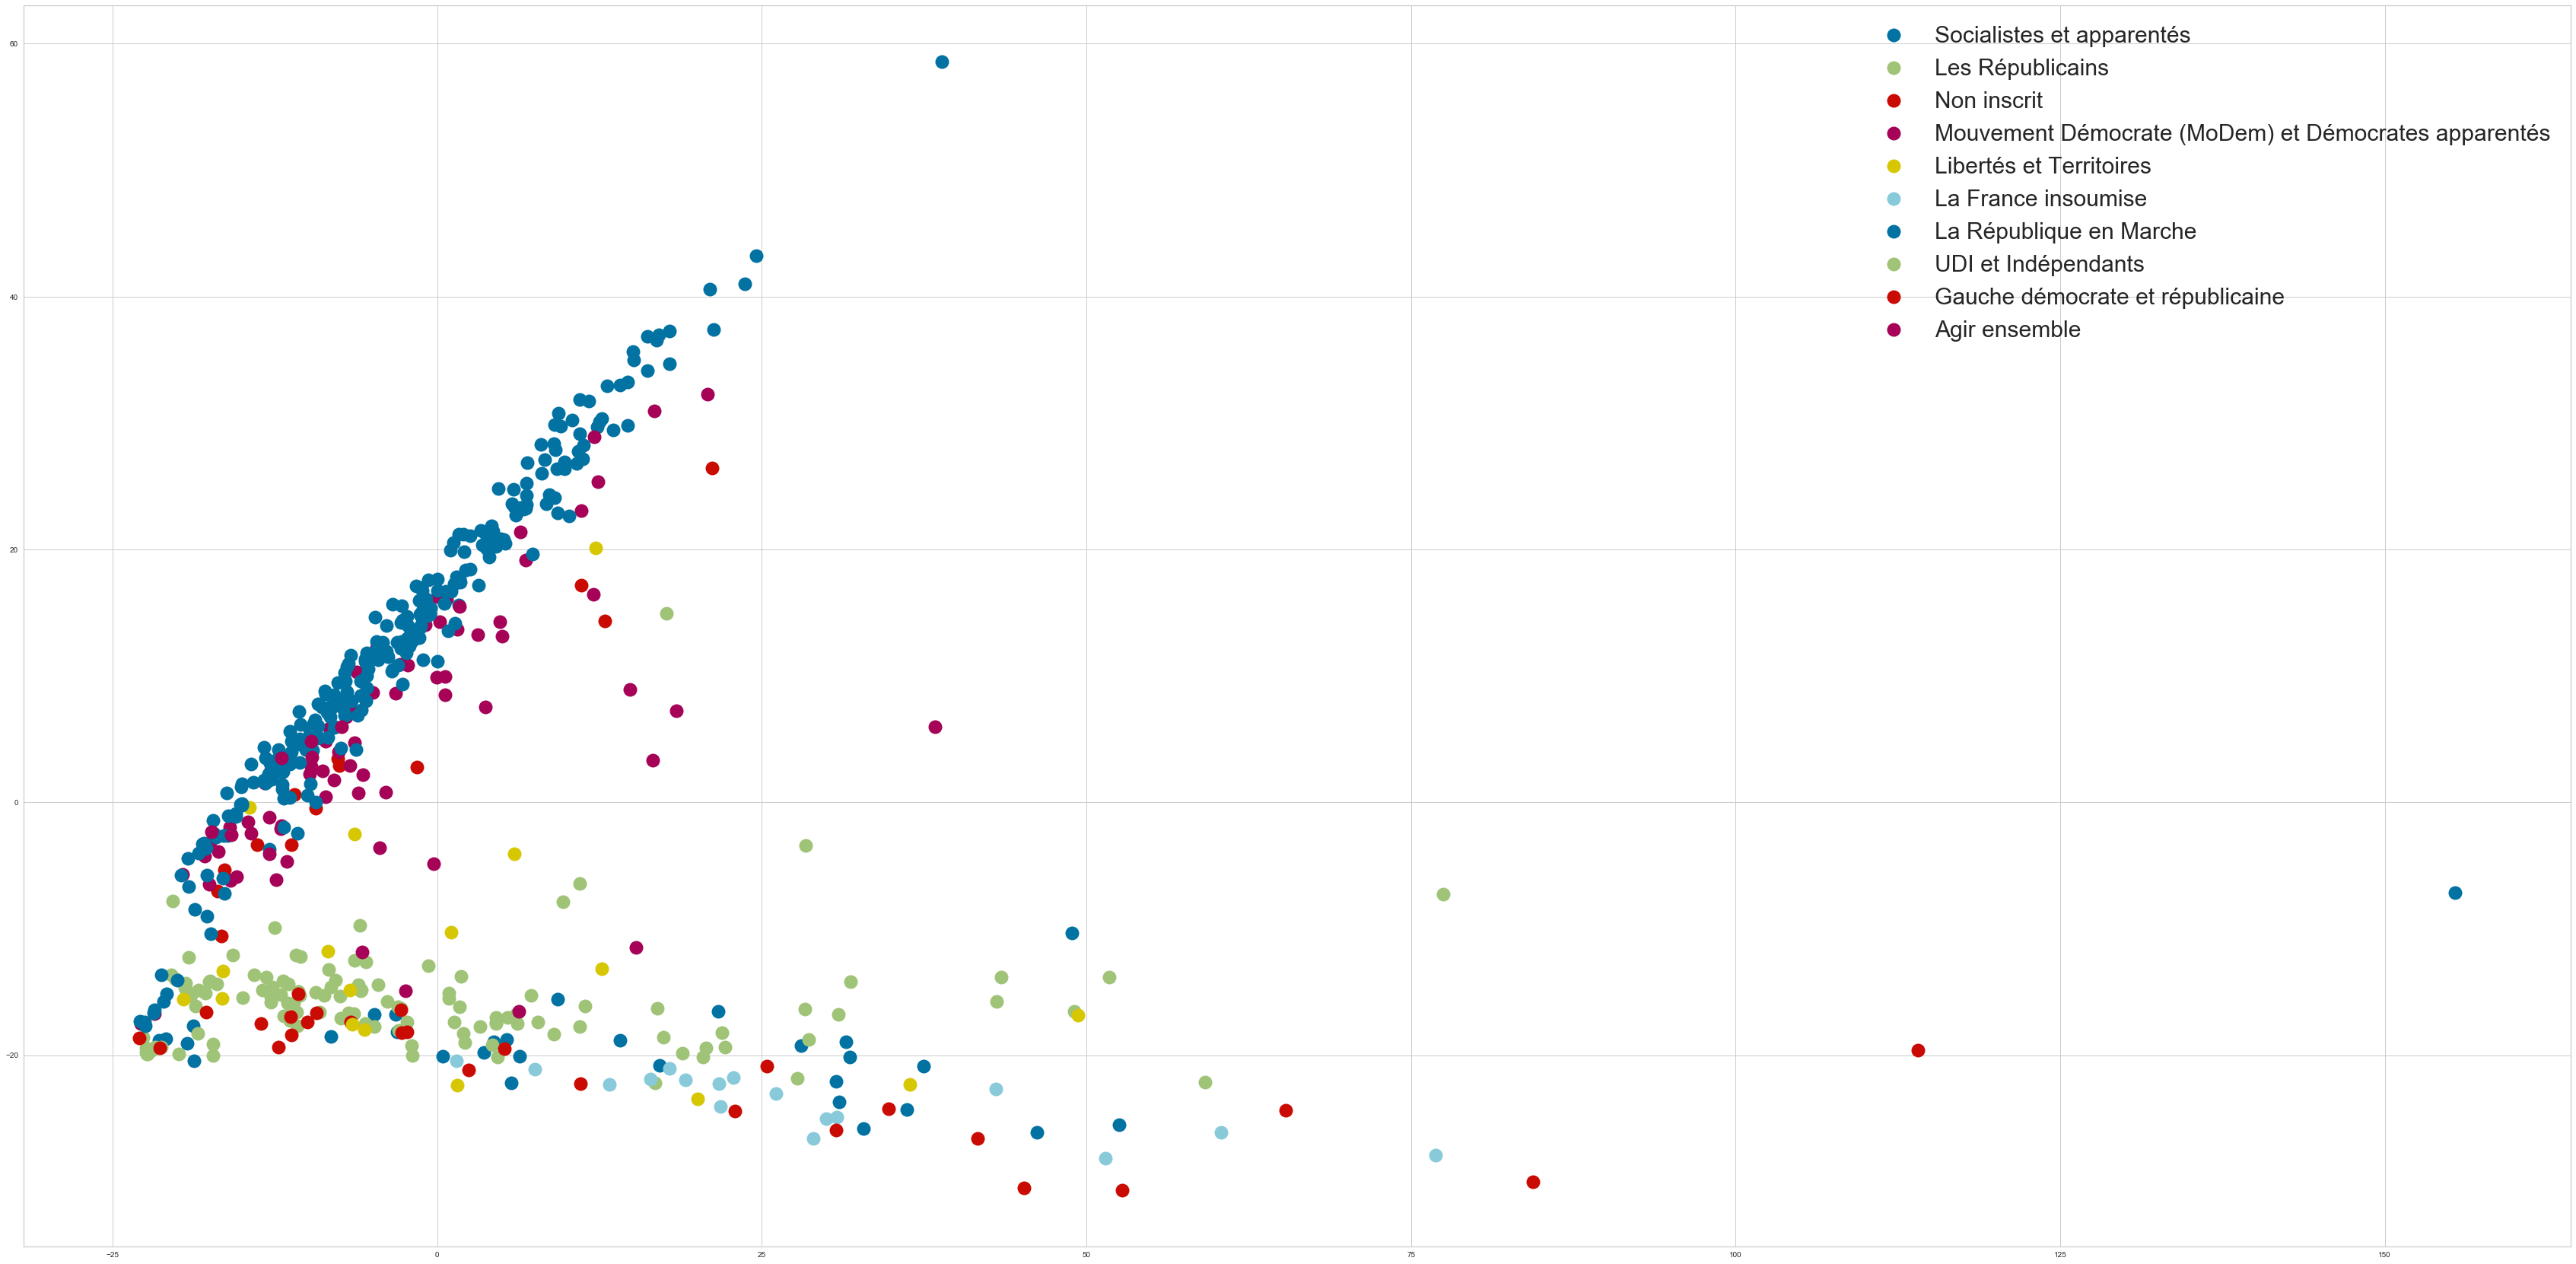

In [57]:
df_clusterised_transform = StandardScaler().fit_transform(df_clusterised_preacp)
pca = PCA(n_components=10).fit(df_clusterised_transform)

print('Variance:',pca.explained_variance_ratio_)
print('Variance totale:',pca.explained_variance_ratio_.sum())

resultats_reduced = pca.transform(df_clusterised_transform)
x = resultats_reduced[:, 0]
y = resultats_reduced[:, 1]

df_plot = pd.DataFrame(dict(x=x, y=y, label=labels))
groups = df_plot.groupby('label')
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [60,30]
ax.margins(0.05)
for name, group in groups:
    groupe = labels_to_groupe[name]
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, label=groupe)
ax.legend(fontsize = 30)

plt.show()

Text(0, 0.5, 'variance expliquée')

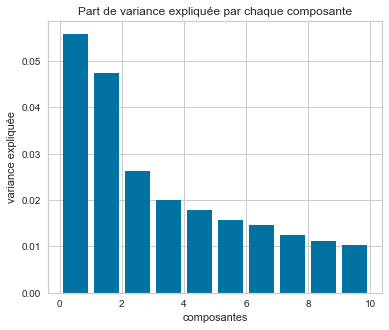

In [63]:
plt.figure(figsize=(6,5))
plt.bar(np.arange(len(pca.explained_variance_ratio_))+0.5, pca.explained_variance_ratio_)
plt.title('Part de variance expliquée par chaque composante')
plt.xlabel('composantes')
plt.ylabel('variance expliquée')

In [65]:
#On regarde plus précisément chaque composante : 
comp = pd.DataFrame(df_clusterised_preacp.columns,columns=['variables'])
comp_0 = np.round(pd.DataFrame(pca.components_[0],columns=['composante_0'])*100, 2)
comp_1 = np.round(pd.DataFrame(pca.components_[1],columns=['composante_1'])*100, 1)
comp_2 = np.round(pd.DataFrame(pca.components_[2],columns=['composante_2'])*100, 1)
comp_3 = np.round(pd.DataFrame(pca.components_[3],columns=['composante_3'])*100, 1)
comp_4 = np.round(pd.DataFrame(pca.components_[4],columns=['composante_4'])*100, 1)

comp=pd.concat([comp, comp_0, comp_1, comp_2, comp_3, comp_4], axis=1)
print(comp)

               variables  composante_0  composante_1  composante_2  \
0                 0_Pour          0.81           0.9           1.5   
1           1_Non-votant         -1.84          -0.3           1.0   
2                 1_Pour          2.19          -1.1          -3.0   
3           2_Non-votant         -1.51          -0.7          -1.2   
4                 2_Pour          1.86          -1.5           1.8   
...                  ...           ...           ...           ...   
6045           3116_Pour          2.27          -2.2           2.2   
6046              Contre         -1.25           4.8          -0.2   
6047                Pour          1.12          -4.8           0.3   
6048       indice_accord         -1.58           4.9          -0.1   
6049  taux_participation          4.13           3.7           0.5   

      composante_3  composante_4  
0             -0.2           0.3  
1             -0.9           1.4  
2              0.4          -0.5  
3             -0.4 

#### ACP sur l'historique de vote seulement

Variance: [0.05579808 0.04703041 0.02638277 0.02004868 0.0179078  0.01574072
 0.01467314 0.01257528 0.01112355 0.01033113]
Variance totale: 0.2316115512284417


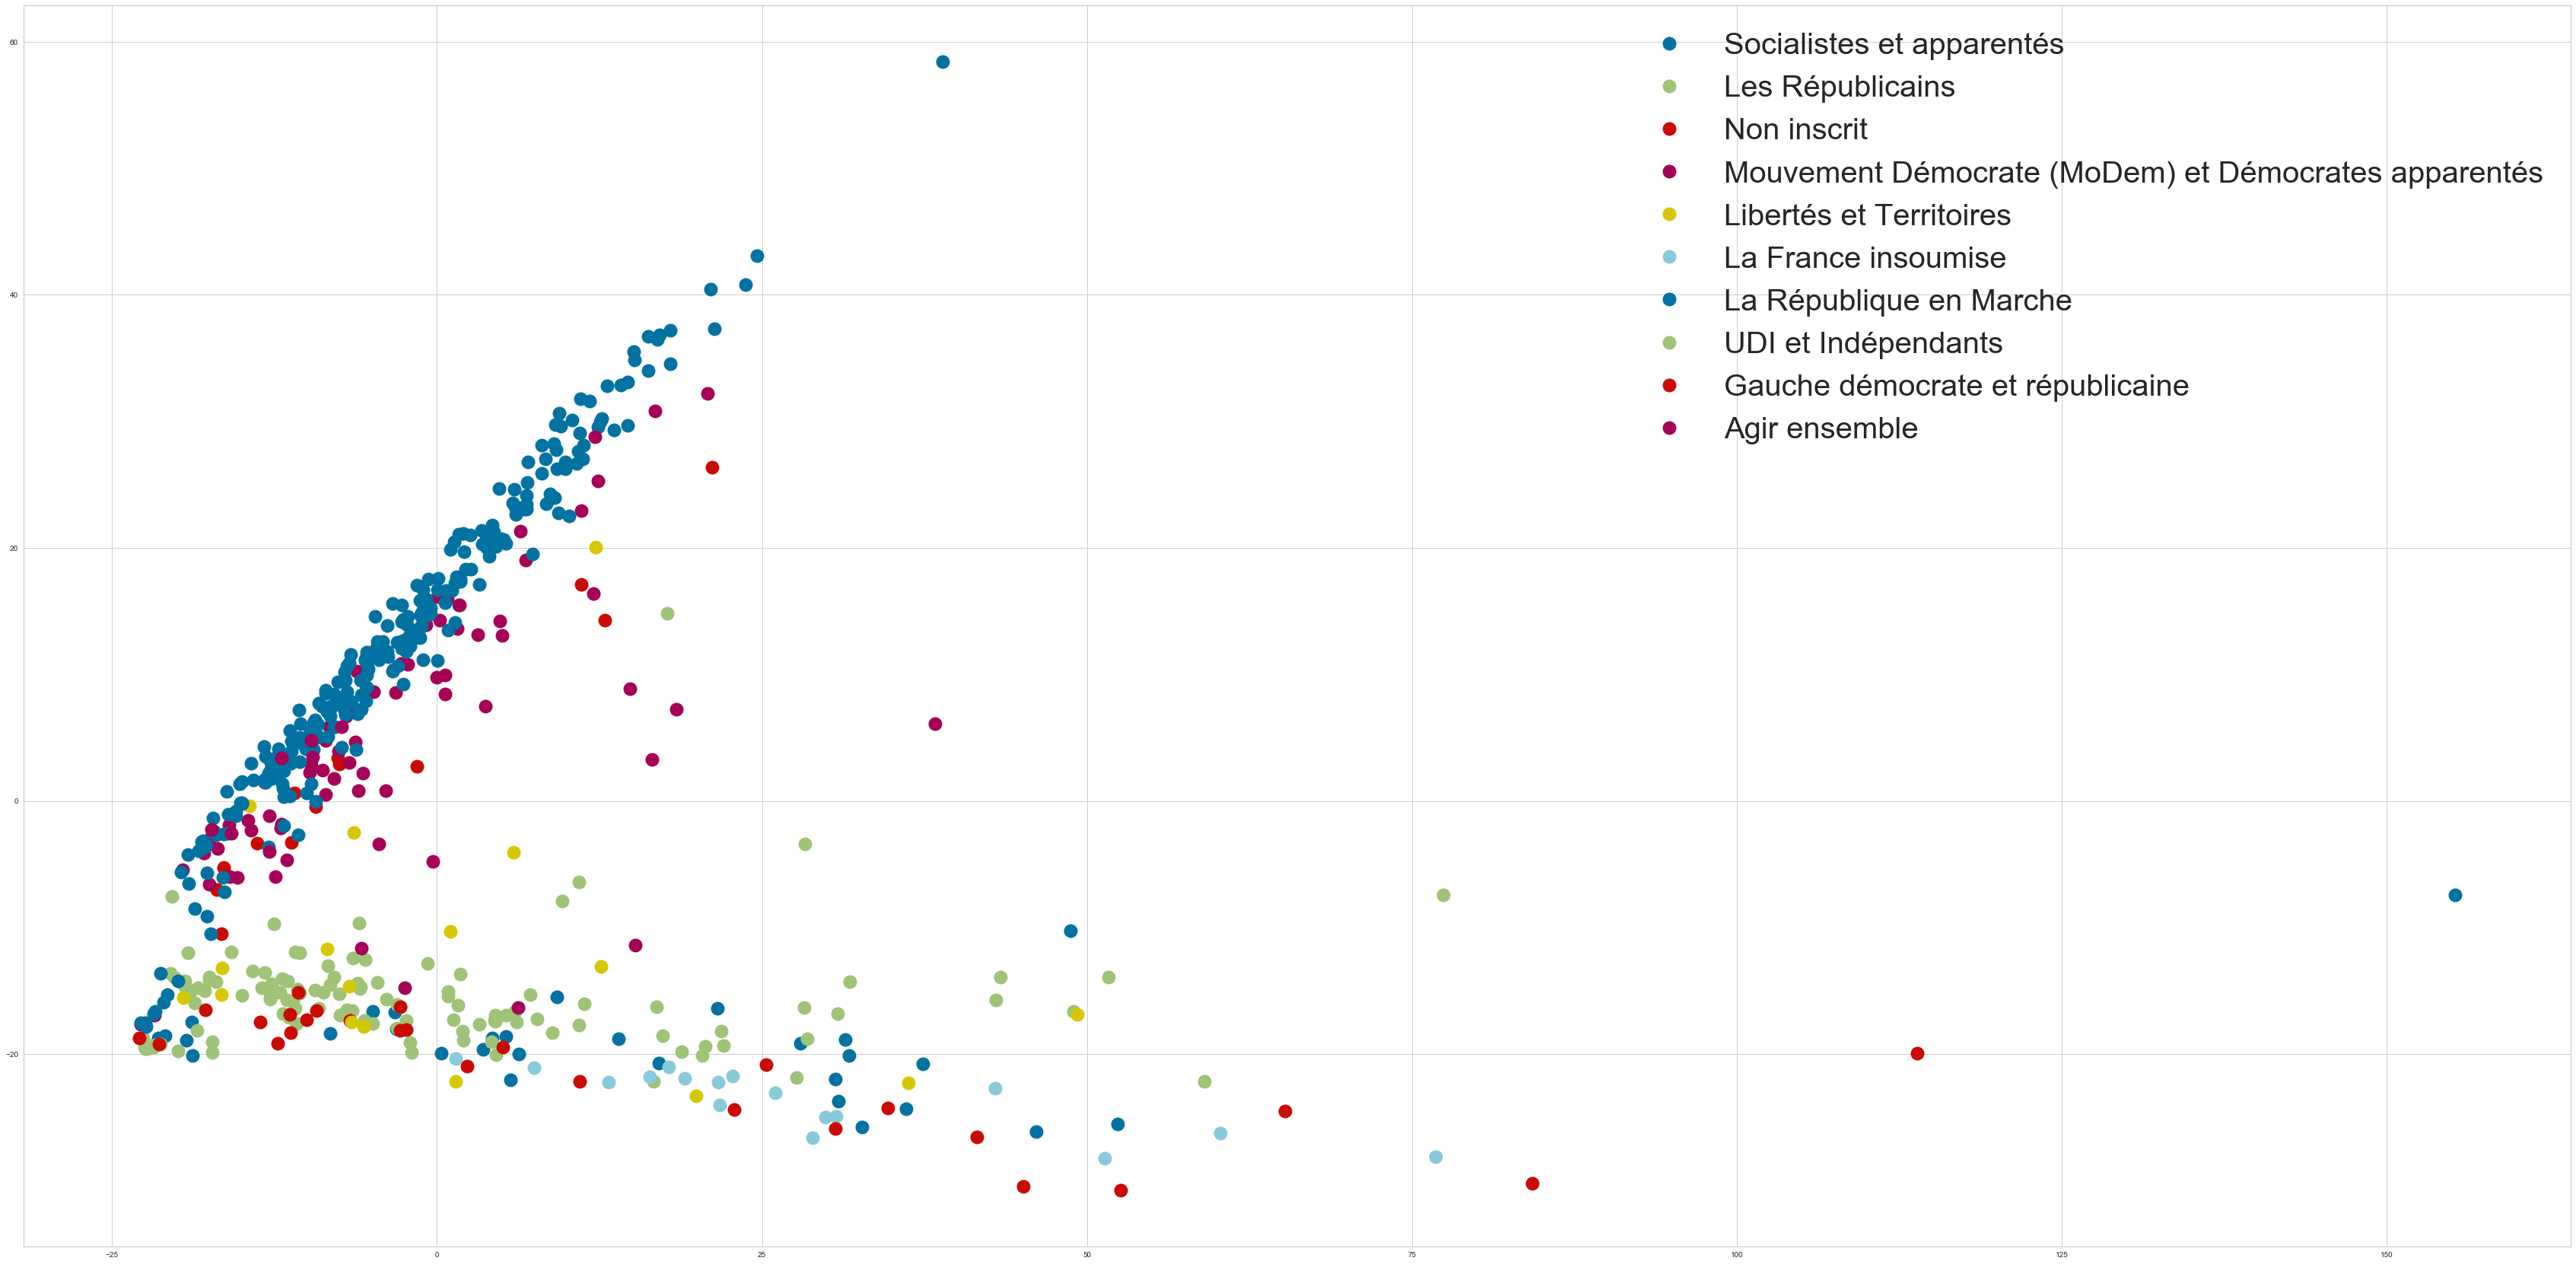

In [66]:
historique_vote_transform = StandardScaler().fit_transform(historique_vote)
pca = PCA(n_components=10).fit(historique_vote_transform)

print('Variance:',pca.explained_variance_ratio_)
print('Variance totale:',pca.explained_variance_ratio_.sum())

resultats_reduced = pca.transform(historique_vote_transform)
x = resultats_reduced[:, 0]
y = resultats_reduced[:, 1]

df_plot = pd.DataFrame(dict(x=x, y=y, label=labels))
groups = df_plot.groupby('label')
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [60,30]
ax.margins(0.05)
for name, group in groups:
    groupe = labels_to_groupe[name]
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, label=groupe)
ax.legend(fontsize = 40)

plt.show()

#### ACP sur les indices uniquement

Variance: [0.75079647 0.2102823  0.03360905 0.00531217]
Variance totale: 1.0


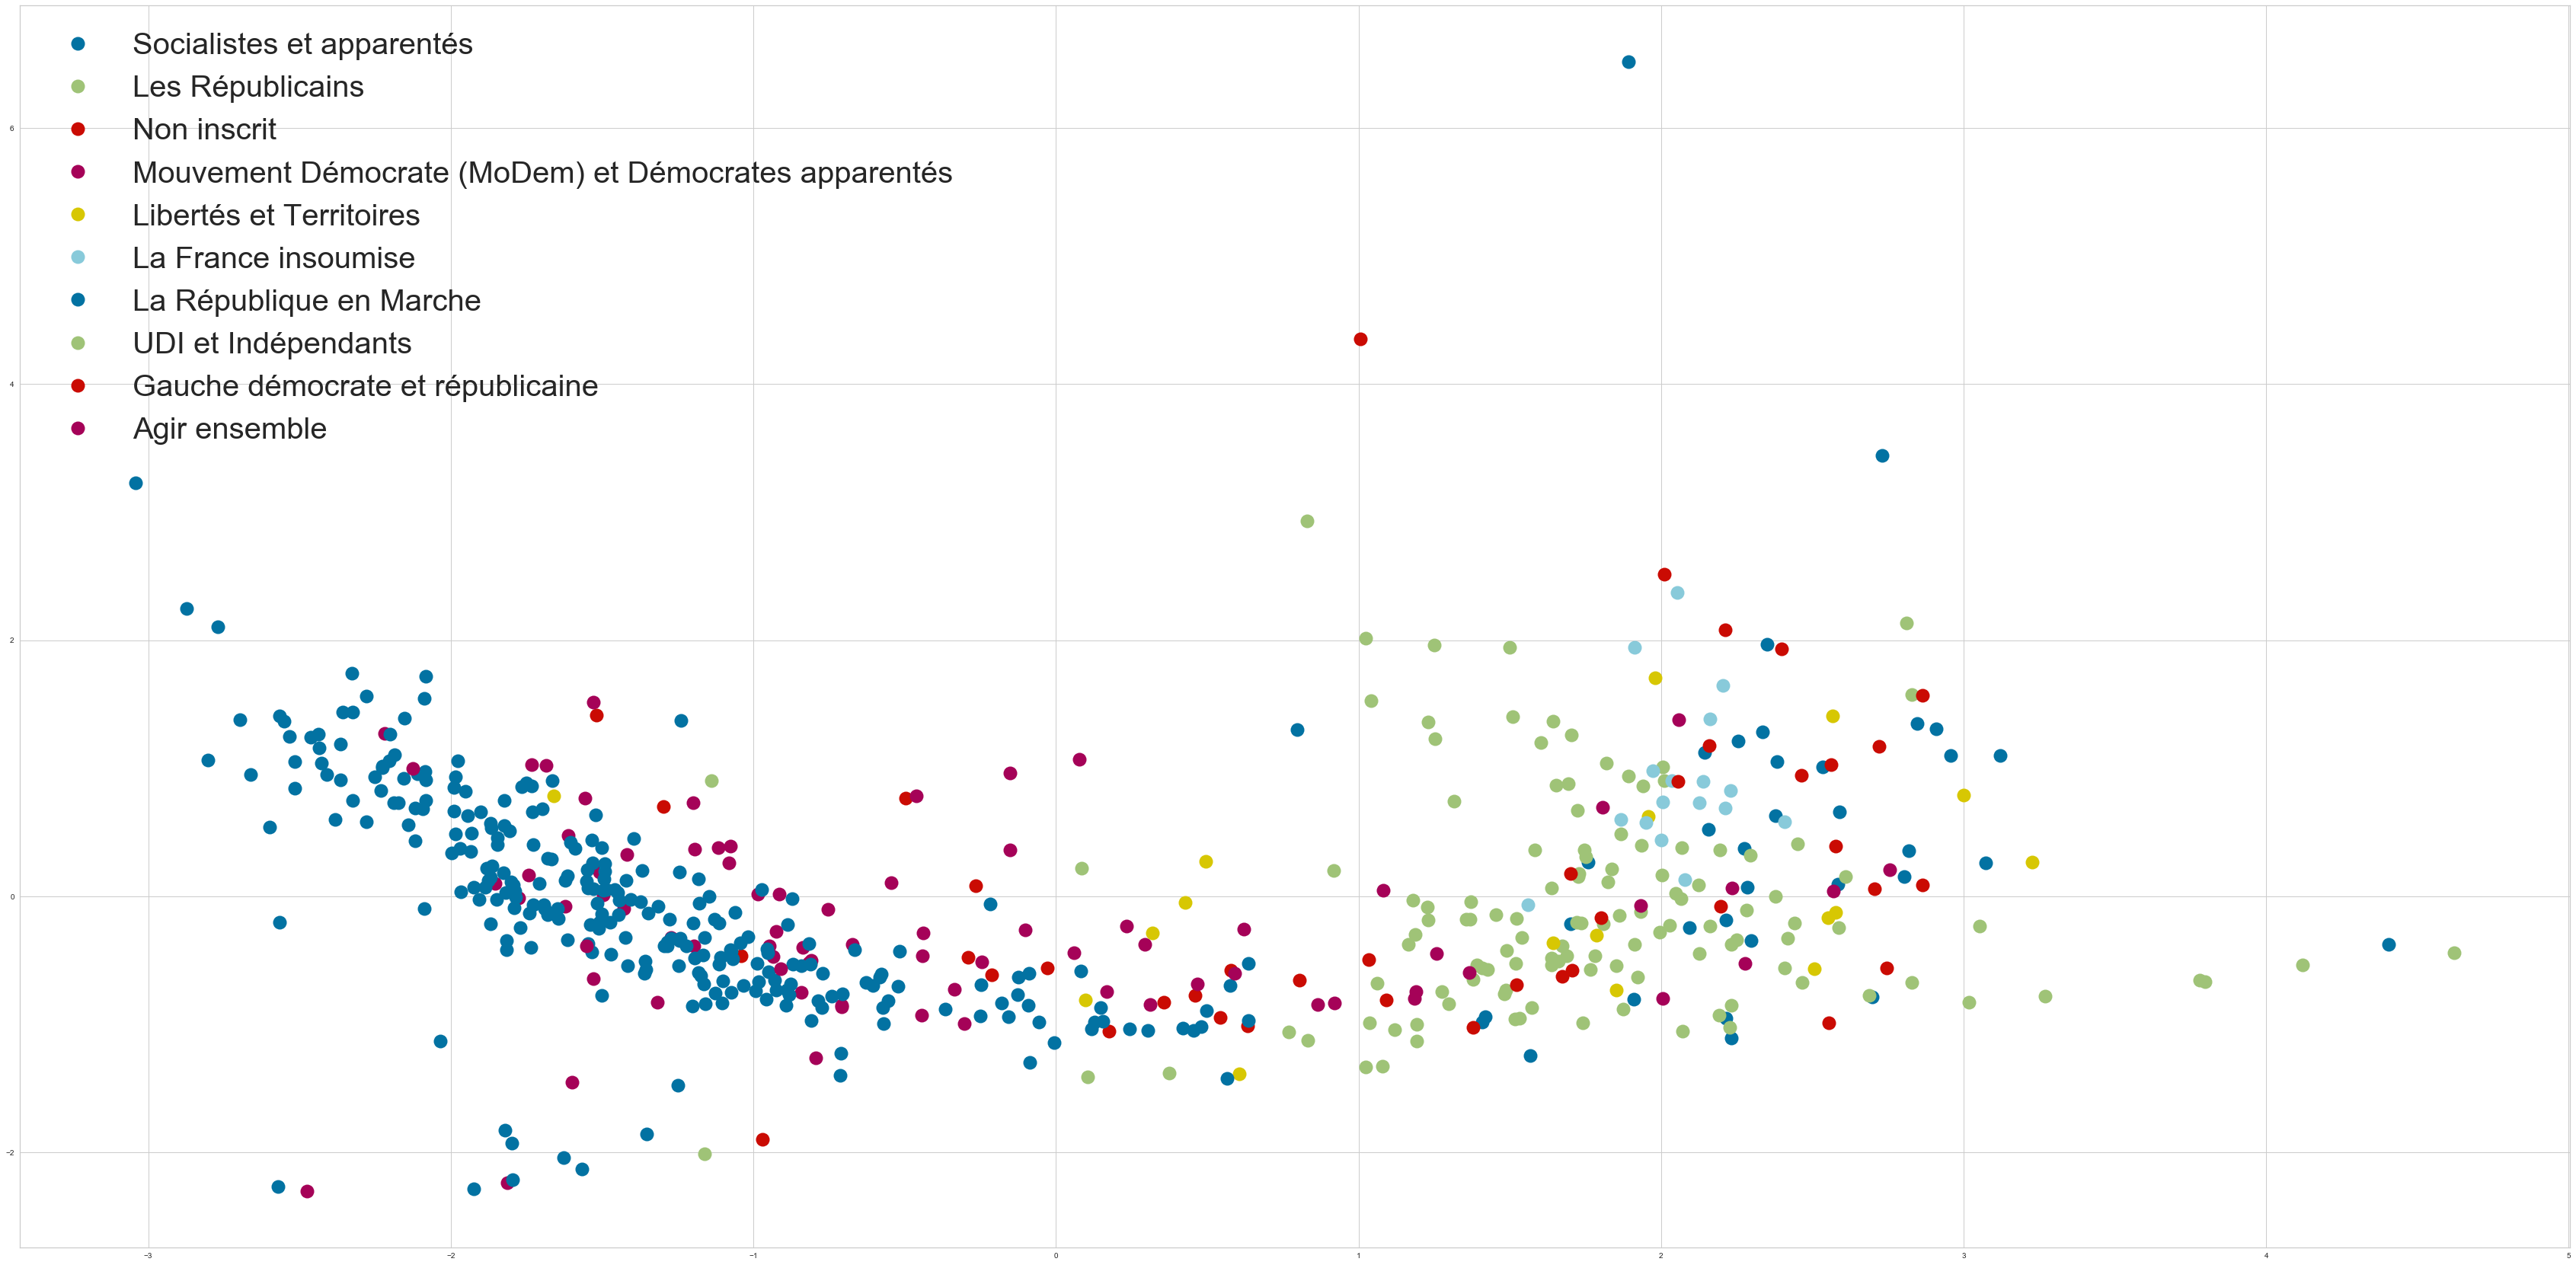

In [70]:
df_indices_transform = StandardScaler().fit_transform(df_indices)
pca = PCA(n_components=4).fit(df_indices_transform)

print('Variance:',pca.explained_variance_ratio_)
print('Variance totale:',pca.explained_variance_ratio_.sum())

resultats_reduced = pca.transform(df_indices_transform)
x = resultats_reduced[:, 0]
y = resultats_reduced[:, 1]

df_plot = pd.DataFrame(dict(x=x, y=y, label=labels))
groups = df_plot.groupby('label')
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [60,30]
ax.margins(0.05)
for name, group in groups:
    groupe = labels_to_groupe[name]
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, label=groupe)
ax.legend(fontsize = 40)

plt.show()

Text(0, 0.5, 'variance expliquée')

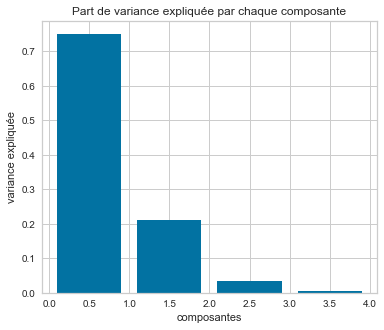

In [71]:
plt.figure(figsize=(6,5))
plt.bar(np.arange(len(pca.explained_variance_ratio_))+0.5, pca.explained_variance_ratio_)
plt.title('Part de variance expliquée par chaque composante')
plt.xlabel('composantes')
plt.ylabel('variance expliquée')

In [72]:
#On regarde plus précisément chaque composante : 
comp = pd.DataFrame(df_indices.columns,columns=['variables'])
comp_0 = np.round(pd.DataFrame(pca.components_[0],columns=['composante_0'])*100, 2)
comp_1 = np.round(pd.DataFrame(pca.components_[1],columns=['composante_1'])*100, 1)
comp_2 = np.round(pd.DataFrame(pca.components_[2],columns=['composante_2'])*100, 1)
comp_3 = np.round(pd.DataFrame(pca.components_[3],columns=['composante_3'])*100, 1)

comp=pd.concat([comp, comp_0, comp_1, comp_2, comp_3], axis=1)
print(comp)

            variables  composante_0  composante_1  composante_2  composante_3
0              Contre        -56.26         -15.6          36.4         -72.6
1                Pour         56.35          10.5         -44.9         -68.5
2       indice_accord        -53.89         -21.6         -81.2           5.6
3  taux_participation        -27.50          95.8          -7.4          -3.0
